##### House Price Prediction Project

##### Goal Of The Project
Predict the price of a house by its features. If you are a buyer or seller of the house but you don’t know the exact price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providing features of the target house.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

##### Load Dataset

In [4]:
train = pd.read_csv('F:\\real_estate\\train.csv')
test = pd.read_csv('F:\\real_estate\\test.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [132]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [133]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


##### Exploratory Data Analysis (EDA)

In [134]:
## concat train and test
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


In [135]:
df.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0


In [136]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


Get The Brief Information Of Data

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [138]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [139]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

##### Data  Cleaning

In [140]:

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [141]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [142]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [143]:
cat_features=df.select_dtypes(include=['object']).columns
int_features=df.select_dtypes(include=[ 'int64']).columns
float_features=df.select_dtypes(include=[ 'float64']).columns


<Axes: >

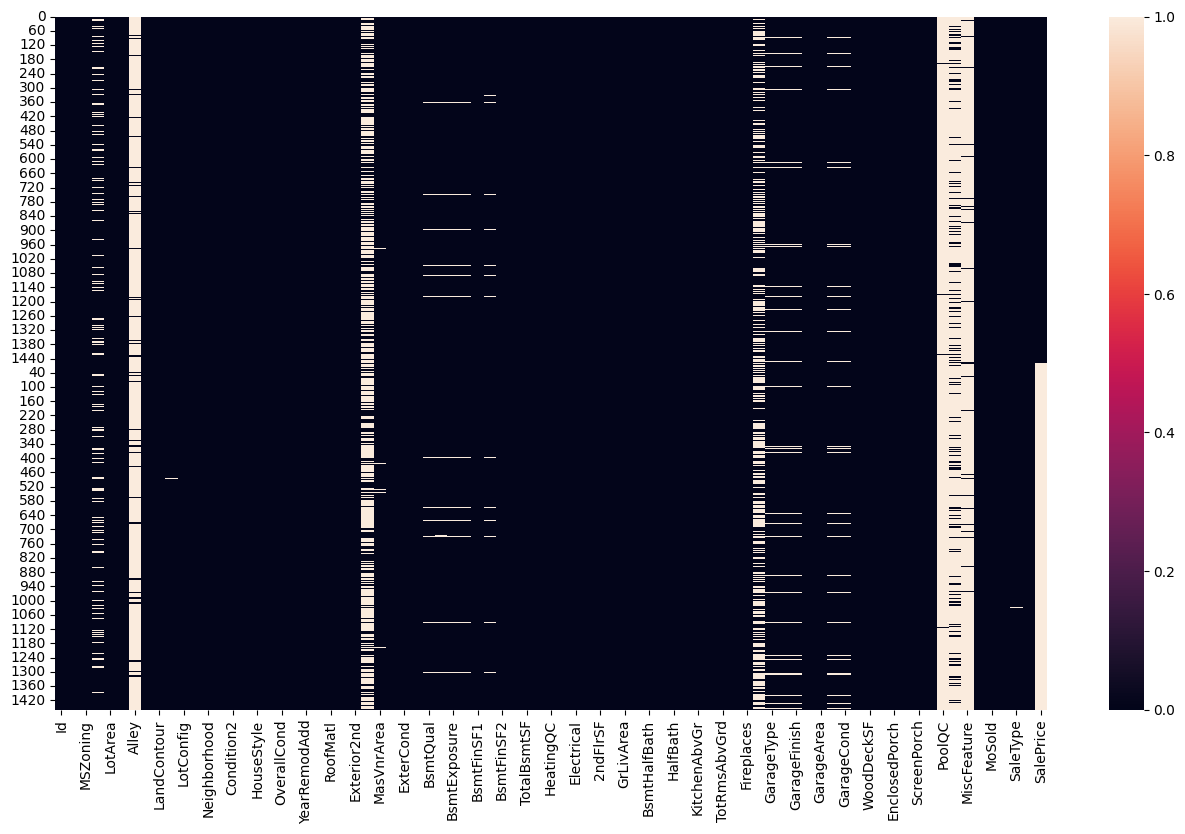

In [144]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [145]:
df=df.set_index("Id")

In [146]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
print(null_percent)

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64


In [147]:
""" As per domain knowledge we will not drop those features, instead null value we will add constat value NA """
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc


Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [148]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [149]:
miss_value_20_perc=null_percent[(null_percent>20) & (null_percent<51)]
miss_value_20_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [150]:
miss_value_5_20_perc=null_percent[(null_percent>5) & (null_percent<21)]
miss_value_20_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

<Axes: ylabel='Id'>

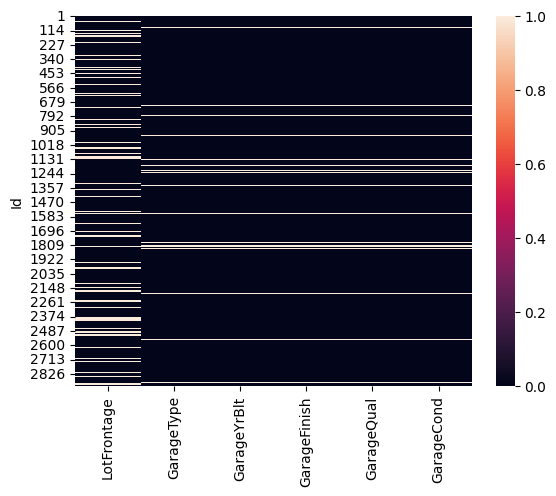

In [151]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## Missing value Information

In [152]:
missing_value_feat=null_percent[null_percent>0]
print("total missing value features = ",len(missing_value_feat))


total missing value features =  35


In [153]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [154]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]


In [155]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of categorical missing features= ",len(cat_na_feat))
cat_na_feat

total number of categorical missing features=  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [156]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total number of categorical missing features= ",len(int_na_feat))
int_na_feat

total number of categorical missing features=  0


Series([], dtype: float64)

In [157]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total number of categorical missing features= ",len(float_na_feat))
float_na_feat

total number of categorical missing features=  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### handling MSZoning

In [158]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

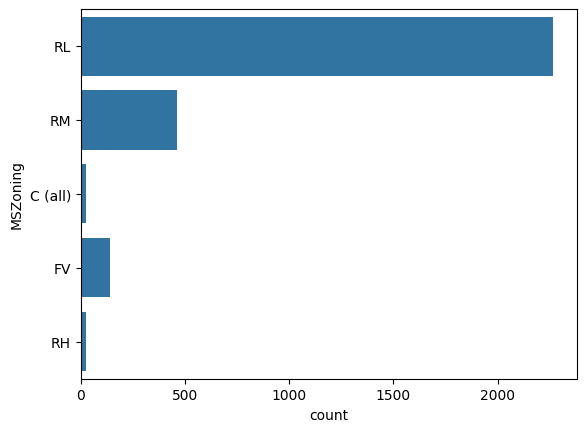

In [159]:
sns.countplot(df["MSZoning"])

In [160]:
##backup of original data
df_mvi=df.copy()
df_mvi.shape

(2919, 80)

In [161]:
mszoning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\931963658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)


np.int64(0)

<Axes: xlabel='count', ylabel='MSZoning'>

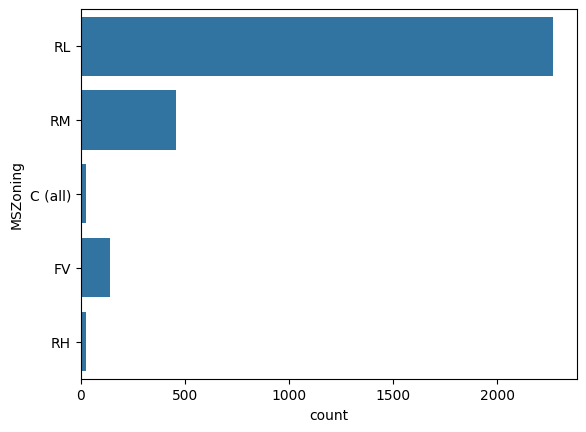

In [162]:
sns.countplot(df_mvi["MSZoning"])

#### Handling Alley

In [163]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [164]:
alley_count="NA"
df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\3922175113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)


np.int64(0)

In [165]:
df_mvi["Alley"].value_counts()

Alley
NA      2721
Grvl     120
Pave      78
Name: count, dtype: int64

### Handling LotFrontage

In [166]:
def boxHistPlot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.histplot(df)

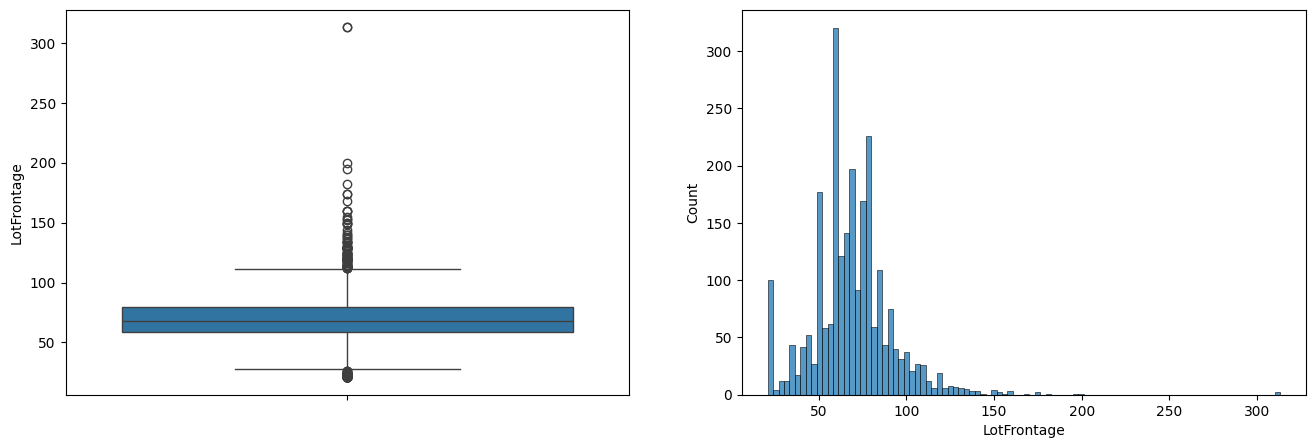

In [167]:
boxHistPlot(df["LotFrontage"])

In [168]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()


C:\Users\naman\AppData\Local\Temp\ipykernel_11004\1150800996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)


np.int64(0)

In [169]:
def oldNewBoxHistPlot(df, df_new, feature):
    plt.figure(figsize=(12, 8))  # Adjust size as needed

    plt.subplot(221)
    sns.boxplot(x=df[feature])
    plt.title("Old Data - Boxplot")

    plt.subplot(222)
    sns.histplot(df[feature], kde=True)
    plt.title("Old Data - Histogram")

    plt.subplot(223)
    sns.boxplot(x=df_new[feature])
    plt.title("New Data - Boxplot")

    plt.subplot(224)
    sns.histplot(df_new[feature], kde=True)
    plt.title("New Data - Histogram")

    plt.tight_layout()
    plt.show()

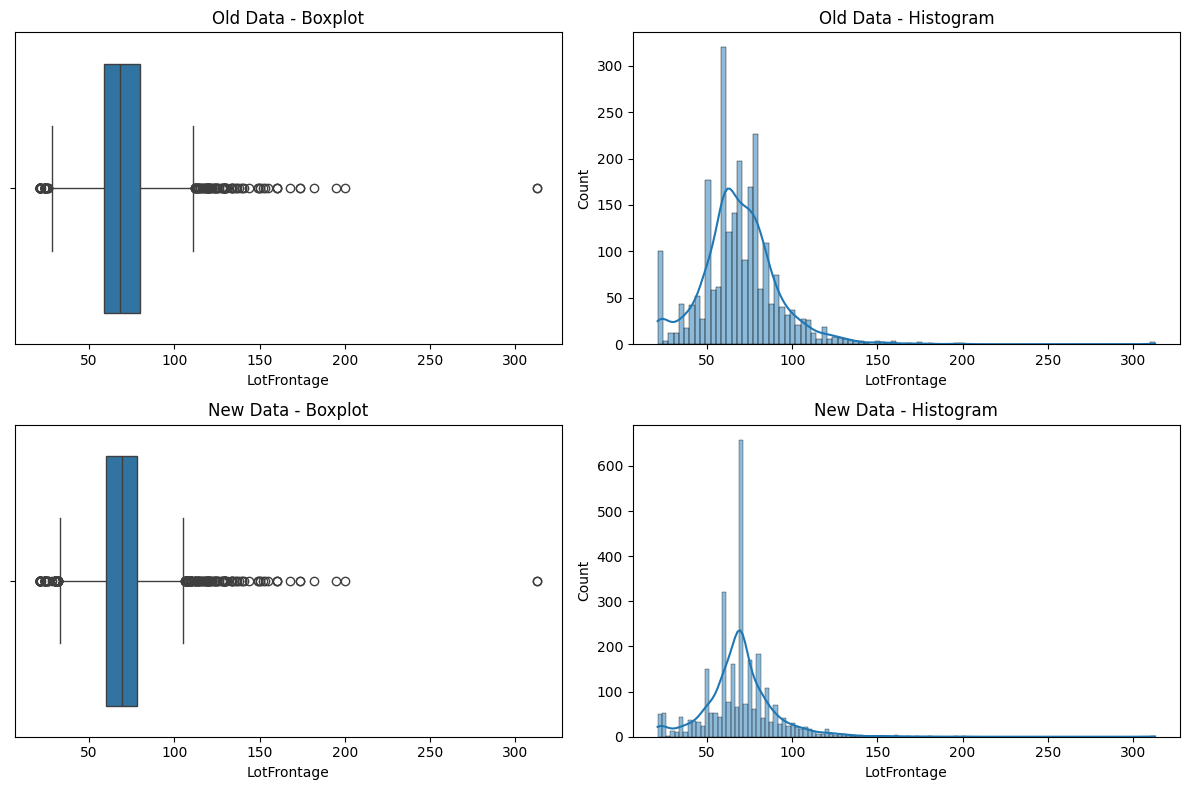

In [170]:
oldNewBoxHistPlot(df,df_mvi,"LotFrontage")

### handling Utilities

In [171]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [172]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].fillna(utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\2517491345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].fillna(utilities_mode, inplace=True)


np.int64(0)

### handling Exterior1st and Exterior2nd

In [173]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [174]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [175]:
Exterior1st_mode = df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].fillna(Exterior1st_mode, inplace=True)
df_mvi["Exterior1st"].isnull().sum()


C:\Users\naman\AppData\Local\Temp\ipykernel_11004\3576786070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].fillna(Exterior1st_mode, inplace=True)


np.int64(0)

In [176]:
Exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].fillna(Exterior2nd_mode, inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\990658263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].fillna(Exterior2nd_mode, inplace=True)


np.int64(0)

### Handling MasVnrtype and masVnrArea

In [177]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [178]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.0      1738
120.0      15
200.0      13
176.0      13
216.0      12
         ... 
355.0       1
405.0       1
327.0       1
257.0       1
382.0       1
Name: count, Length: 444, dtype: int64

<Axes: ylabel='Id'>

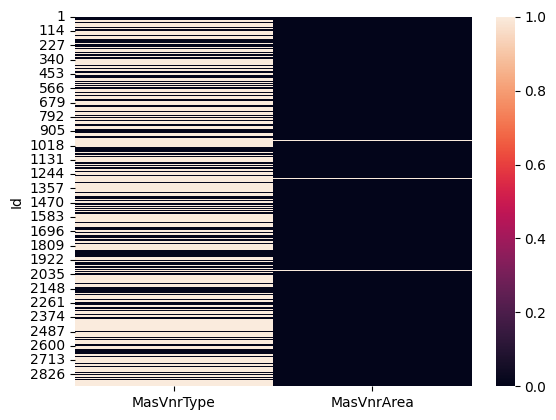

In [179]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())


In [180]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN


In [181]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [182]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].fillna(masvnrtype_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\1967157204.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].fillna(masvnrtype_mode, inplace=True)


np.int64(0)

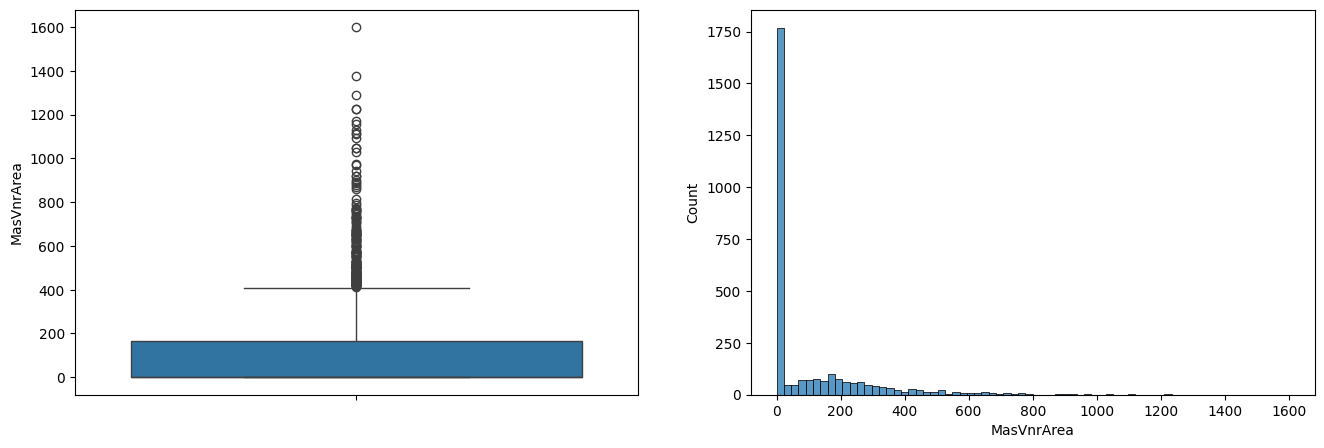

In [183]:
boxHistPlot(df["MasVnrArea"])

In [184]:
masvnrarea_mode = 0
df_mvi["MasVnrArea"].fillna(masvnrarea_mode, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\2797989222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].fillna(masvnrarea_mode, inplace=True)


np.int64(0)

In [185]:
 cat_bsmt_feat=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

In [186]:

num_bstm_feat=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath"]

<Axes: ylabel='Id'>

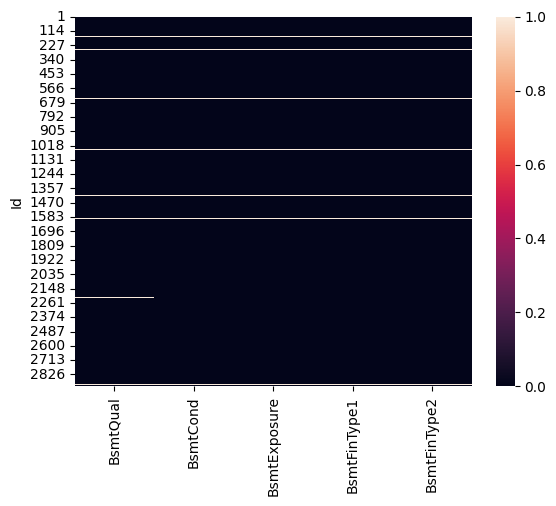

In [187]:
sns.heatmap(df[cat_bsmt_feat].isnull())


In [188]:
for feat in cat_bsmt_feat:
    print(f"value count of {feat}: {df[feat].value_counts()}")

value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [189]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace =True)

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\2221775696.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont,inplace =True)


In [190]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

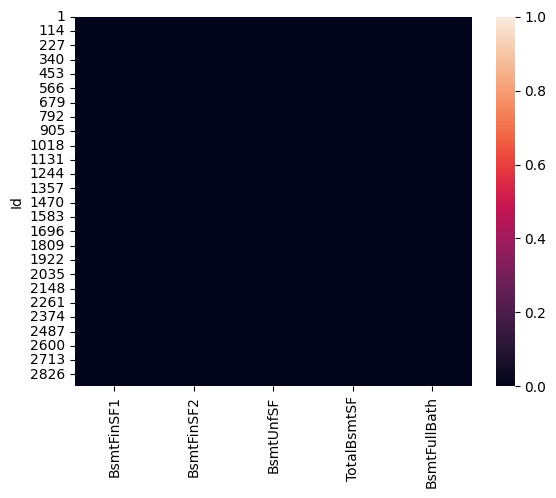

In [191]:
sns.heatmap(df[num_bstm_feat].isnull())

In [192]:
bsmt_num=0
for feat in num_bstm_feat:
    df_mvi[feat].replace(np.nan,bsmt_num, inplace=True)

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\169335294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_num, inplace=True)


In [193]:
df_mvi[num_bstm_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
dtype: int64

### Handling Electrical and KitchenQual

In [194]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [195]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [196]:
electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].fillna(electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\26490656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].fillna(electrical_mode, inplace=True)


np.int64(0)

In [197]:
kitchen_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].fillna(kitchen_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\3129101884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].fillna(kitchen_mode, inplace=True)


np.int64(0)

### handling remaining cat features

In [198]:
functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].fillna(functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\4079734882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].fillna(functional_mode, inplace=True)


np.int64(0)

In [199]:
sale_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].fillna(sale_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\3507412206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].fillna(sale_mode, inplace=True)


np.int64(0)

In [200]:
other_cat_feat=["FireplaceQu","PoolQC","Fence","MiscFeature"]
for feat in other_cat_feat:
    print(f"value count of {feat}: {df[feat].value_counts()}")

value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [201]:
fireplacequ_cont="NA"
df_mvi["FireplaceQu"].fillna(fireplacequ_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\572592212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].fillna(fireplacequ_cont, inplace=True)


np.int64(0)

In [202]:
poolqc_cont="NA"
df_mvi["PoolQC"].fillna(poolqc_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\1604422228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].fillna(poolqc_cont, inplace=True)


np.int64(0)

In [203]:
fence_cont="NA"
df_mvi["Fence"].fillna(fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\660604749.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].fillna(fence_cont, inplace=True)


np.int64(0)

In [204]:
misc_cont="NA"
df_mvi["MiscFeature"].fillna(misc_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\naman\AppData\Local\Temp\ipykernel_11004\365490309.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].fillna(misc_cont, inplace=True)


np.int64(0)

### Handling garage features

In [205]:
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]

df_garafe=df[num_garage_feat+cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2894,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2910,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2914,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [206]:
garage_cont="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_cont,inplace=True)
df_mvi[cat_garage_feat].isnull().sum()


C:\Users\naman\AppData\Local\Temp\ipykernel_11004\153700386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garage_cont,inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Feature Transformation

#### Convert numerical Feature to categorical feature

In [207]:
for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}:data type={df_mvi[feat].dtype}")


MSSubClass:data type=int64
YearBuilt:data type=int64
YearRemodAdd:data type=int64
GarageYrBlt:data type=float64
MoSold:data type=int64
YrSold:data type=int64


In [208]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [209]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [210]:
import calendar
calendar.month_abbr[12]


'Dec'

In [211]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [212]:
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)


In [213]:
for feat in for_num_conv:
    print(f"{feat}:data type={df_mvi[feat].dtype}")


MSSubClass:data type=object
YearBuilt:data type=object
YearRemodAdd:data type=object
GarageYrBlt:data type=object
MoSold:data type=object
YrSold:data type=object


### Converting categorical data to numerical value

#### Ordinal encoding

In [214]:
ordinal_end_var=["Utilities","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFintype1","BsmtFintype2","BsmtFinSF1","HeatingQC","PoolQC"       
"KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive"]     



In [215]:

df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [216]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [217]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [218]:
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes


In [219]:
df_mvi["ExterCond"].value_counts()

ExterCond
2    2538
3     299
1      67
4      12
0       3
Name: count, dtype: int64

In [220]:
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"].value_counts()

BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64

In [221]:
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"].value_counts()

BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64

In [222]:
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"].value_counts()

BsmtFinType1
1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: count, dtype: int64

In [223]:
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"].value_counts()

BsmtFinType2
1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: count, dtype: int64

In [224]:
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["HeatingQC"].value_counts()

HeatingQC
4    1493
2     857
3     474
1      92
0       3
Name: count, dtype: int64

In [225]:
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"].value_counts()

KitchenQual
2    1493
3    1151
4     205
1      70
Name: count, dtype: int64

In [226]:
df_mvi["FireplaceQu"]=df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["FireplaceQu"].value_counts()

FireplaceQu
0    1420
4     744
3     592
2      74
1      46
5      43
Name: count, dtype: int64

In [227]:
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"].value_counts()

GarageQual
3    2604
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64

In [228]:
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"].value_counts()

GarageCond
3    2654
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64

In [229]:
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["Functional"].value_counts()

Functional
7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: count, dtype: int64

In [230]:
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["GarageFinish"].value_counts()

GarageFinish
1    1230
2     811
3     719
0     159
Name: count, dtype: int64

In [231]:
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["PavedDrive"].value_counts()

PavedDrive
2    2641
0     216
1      62
Name: count, dtype: int64

In [232]:
df_mvi["Utilities"].unique()


array(['AllPub', 'NoSeWa'], dtype=object)

In [233]:
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["NoSeWa","AllPub"],ordered=True)).cat.codes
df_mvi["Utilities"].value_counts()

Utilities
1    2918
0       1
Name: count, dtype: int64

In [234]:
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","Fa","Gd","Ex"],ordered=True)).cat.codes
df_mvi["PoolQC"].value_counts()

PoolQC
0    2909
3       4
2       4
1       2
Name: count, dtype: int64

In [235]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### One Hot Encoding for Nominal Category Data

In [236]:
df_encod=df_mvi.copy()
object_features=df_encod.select_dtypes(include="object").columns.tolist()
print("Features: \n ",object_features)

Features: 
  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [237]:
df_encod["MSZoning"].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [238]:
print("Shape of Df Before Encoding :",df_encod.shape)

Shape of Df Before Encoding : (2919, 80)


In [239]:
df_encod = pd.get_dummies(df_encod, columns=object_features, prefix=object_features, drop_first=True)


In [240]:
print("Shape of Df After Encoding :",df_encod.shape)

Shape of Df After Encoding : (2919, 512)


In [241]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,1,7,5,196.0,3,2,4,3,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,1,6,8,0.0,2,2,4,3,...,False,False,False,False,True,False,False,False,True,False


In [242]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 512 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(464), float64(11), int64(20), int8(17)
memory usage: 2.1 MB


In [243]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

### Split data for Training and Testing

In [244]:
df_encod.shape

(2919, 512)

In [245]:
len_train=train.shape[0]
len_train

1460

In [246]:
x_train=df_encod[:len_train].drop("SalePrice",axis=1)
y_train=df_encod["SalePrice"][:len_train]
x_test=df_encod[len_train:].drop("SalePrice",axis=1)

print("Shape of x_train data : ",x_train.shape)
print("Shape of y_train data : ",y_train.shape)
print("Shape of x_test data : ",x_test.shape)


Shape of x_train data :  (1460, 511)
Shape of y_train data :  (1460,)
Shape of x_test data :  (1459, 511)


### Feature Scaling

In [247]:
sc=StandardScaler()
sc.fit(x_train)
#Formula z=(x-u)/s

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)


In [248]:
x_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [249]:
x_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

### Train ML Model

In [250]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor


from xgboost import XGBRegressor


In [251]:
svr=SVR()
lr =LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
xgor=XGBRegressor()
mlpr=MLPRegressor()



In [252]:
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr],
    "i": ["XGBRegressor", xgor],
    "j": ["MLPRegressor", mlpr]
    
}


### Cross Validation

In [253]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
def test_model (model, x_train=x_train, y_train=y_train):
    cv=KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score (model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [254]:
models_score = []

for model in models:
    print("Training model:", models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model:", float(score[0]))
    models_score.append([models[model][0], float(score[0])])


Training model: LinearRegression
Score of model: -1.7264488531815463e+24
Training model: SVR
Score of model: -0.052136493990231
Training model: SGDRegressor
Score of model: -2860.0024779471596
Training model: KNeighborsRegressor
Score of model: 0.5613215136955007
Training model: GaussianProcessRegressor
Score of model: -5.398916233825027
Training model: DecisionTreeRegressor
Score of model: 0.6427354012779369
Training model: GradientBoostingRegressor
Score of model: 0.8734244626308519
Training model: RandomForestRegressor
Score of model: 0.8469932263247975
Training model: XGBRegressor
Score of model: 0.8647006248183509
Training model: MLPRegressor


c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Score of model: -4.837871932348302


c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameter Tuning

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor


In [256]:
# Define models
models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42, verbosity=0)
}

# Define parameter grids
param_grids = {
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "XGBRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}


In [257]:
best_models = {}

for name in models:
    print(f"\n Tuning {name}...")
    
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=5,
        scoring="r2",
        n_jobs=-1
    )
    
    grid.fit(x_train, y_train)
    
    print(f" Best R² Score for {name}: {grid.best_score_:.4f}")
    print(f" Best Params: {grid.best_params_}")
    
    best_models[name] = grid.best_estimator_



 Tuning RandomForestRegressor...
 Best R² Score for RandomForestRegressor: 0.8585
 Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

 Tuning GradientBoostingRegressor...
 Best R² Score for GradientBoostingRegressor: 0.8901
 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

 Tuning XGBRegressor...
 Best R² Score for XGBRegressor: 0.8807
 Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
